In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from docx import Document
from io import BytesIO


In [ ]:

# 读取配置文件
config_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/指标数据20231120.xlsx',header=0, sheet_name='指标数据')

# 显示数据或进行其他操作
# print(config_df.head())  # 显示前几行数据

# 选择行业编码为 'C'（制造业）的行
manufacturing_data = config_df[(config_df['产业名称'] == '制造业采购经理指数') & (config_df['指标名称'] == 'PMI指数_当期值')]

#PMI指数_当期值

# 显示制造业的数据或进行其他操作


In [ ]:
print(manufacturing_data)  # 显示前几行数据

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.dates import DateFormatter, MonthLocator  # Add this line
from docx import Document
from io import BytesIO

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 设置中文字体为系统自带的中文字体，如 macOS 的 Arial Unicode MS

# 读取配置文件
config_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='指标数据')

manufacturing_data = config_df[(config_df['产业名称'] == '制造业采购经理指数') & (config_df['指标名称'] == 'PMI指数_当期值')]

# 筛选出 2021 年及之后的数据
manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')
manufacturing_data = manufacturing_data[manufacturing_data['报告期编码'].dt.year >= 2021]

# 将报告期编码转换为日期格式，跳过无法转换的值并输出异常信息
errors = []
try:
    manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')
except Exception as e:
    errors.append(str(e))

# 去除无法转换为日期的行
manufacturing_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
manufacturing_data['数据值'] = pd.to_numeric(manufacturing_data['数据值'], errors='coerce')

# 去除非数值型数据行
manufacturing_data.dropna(subset=['数据值'], inplace=True)

# 按地区编码和月份进行数据分组，计算每个月的平均值
grouped_data = manufacturing_data.groupby(['地区编码', pd.Grouper(key='报告期编码', freq='M')])['数据值'].mean().reset_index()

# 创建图表
plt.figure(figsize=(10, 6))  # 设置图形大小

# 遍历分组数据并画折线图
for region_code, group_data in grouped_data.groupby('地区编码'):
    plt.plot(group_data['报告期编码'], group_data['数据值'], label=region_code, marker='o', linestyle='-')

# 设置图例、标题和坐标轴标签（使用中文）
plt.legend(title='地区编码')  # 添加图例
plt.title('不同地区制造业 PMI指数_月平均值折线图')  # 设置标题
plt.xlabel('报告期编码')  # 设置 x 轴标签
plt.ylabel('PMI指数_月平均值')  # 设置 y 轴标签
plt.xticks(rotation=45)  # 设置 x 轴刻度角度

# 输出无法转换的异常信息
if errors:
    print("无法转换为日期的值列表：")
    for error in errors:
        print(error)

# 保存图表到 BytesIO 对象
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# 创建 Word 文档
doc = Document()
doc.add_paragraph("制造业 PMI指数_月平均值折线图")

# 将图表保存到 Word 文档中
doc.add_picture(image_stream)

# 保存 Word 文档
doc.save('PMI月均值折线图.docx')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.dates import DateFormatter, MonthLocator  # Add this line
from matplotlib.ticker import FuncFormatter # 用于改y轴格式
from docx import Document
from io import BytesIO

# 读取配置文件
config_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='指标数据')

# 选择行业编码为 'C'（制造业）且指标名称为 'PMI指数_当期值' 的行
manufacturing_data = config_df[(config_df['产业名称'] == '制造业采购经理指数') & (config_df['指标名称'] == 'PMI指数_当期值')]

# 筛选出 2021 年及之后的数据
manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')
manufacturing_data = manufacturing_data[manufacturing_data['报告期编码'].dt.year >= 2021]

# 去除非日期值的行
manufacturing_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
manufacturing_data['数据值'] = pd.to_numeric(manufacturing_data['数据值'], errors='coerce')

# 去除非数值型数据行
manufacturing_data.dropna(subset=['数据值'], inplace=True)

# 筛选出全国和北京的数据
national_data = manufacturing_data[manufacturing_data['地区编码'] == '000000']
beijing_data = manufacturing_data[manufacturing_data['地区编码'] == '110000']

# 按地区编码和月份进行数据分组，计算每个月的平均值
grouped_national = national_data.groupby(pd.Grouper(key='报告期编码', freq='1M'))['数据值'].mean().reset_index()
grouped_beijing = beijing_data.groupby(pd.Grouper(key='报告期编码', freq='1M'))['数据值'].mean().reset_index()

# 创建图表
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制全国数据，使用方形标记点
plt.plot(grouped_national['报告期编码'], grouped_national['数据值'], label='全国', marker='s', linestyle='-')

# 绘制北京数据，使用方形标记点
plt.plot(grouped_beijing['报告期编码'], grouped_beijing['数据值'], label='北京', marker='s', linestyle='-')

# 设置图例、标题和坐标轴标签（使用中文）
plt.legend(loc='lower center', ncol=2, frameon=False,bbox_to_anchor=(0.5, -0.15),)  # 添加图例，放在图的下方
# plt.title('全国和北京制造业 PMI指数月平均值折线图')  # 设置标题
# plt.xlabel('报告期编码')  # 设置 x 轴标签
# plt.ylabel('PMI指数_月平均值')  # 设置 y 轴标签
# plt.xticks(rotation=45)  # 设置 x 轴刻度角度

# 设置 Y 轴标签格式为百分比
def y_fmt(y, pos):
    return f'{y:.0f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

# 获取 x 轴的最小和最大日期
x_min = min(min(grouped_national['报告期编码']), min(grouped_beijing['报告期编码']))
x_max = max(max(grouped_national['报告期编码']), max(grouped_beijing['报告期编码']))


# 获取 x 轴的刻度
x_ticks = pd.date_range(start=x_min, end=x_max, freq='M').strftime('%Y-%m').tolist()
x_ticks = [tick for tick in x_ticks if tick[-2:] in ['01', '04', '07', '10']]  # 保留 1、3、7、10 月份的刻度


# 设置 X 轴的刻度和标签
plt.xticks(x_ticks)
# 设置 X 轴的刻度为月份，间隔为3个月
# plt.gca().xaxis.set_major_locator(MonthLocator(bymonthday=1, interval=3))
date_format = DateFormatter("%Y%m")  # 设置日期格式为年月
plt.gca().xaxis.set_major_formatter(date_format)
# 保存图表到 BytesIO 对象
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# 创建 Word 文档
doc = Document()
doc.add_paragraph("制造业 PMI指数_月平均值折线图")

# 将图表保存到 Word 文档中
doc.add_picture(image_stream)

# 保存 Word 文档
doc.save('PMI月均值折线图.docx')

# 合并全国和北京的数据
merged_data = pd.concat([grouped_national, grouped_beijing['数据值']], axis=1)
merged_data.columns = ['报告期编码', '全国', '北京']

# 保存合并后的数据为一个 CSV 文件，并指定编码为 UTF-8
merged_data.to_csv('national_and_beijing_data.csv', index=False, encoding='utf-8-sig')




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import BytesIO
from docx import Document

# 假设数据已经加载到 config_df 中

# 选择特定产业名称的数据
desired_industries = ['生产指数', '新订单指数', '原材料库存指数', '主要原材料购进价格指数', '供应商配送时间指数']
selected_data = config_df[config_df['产业名称'].isin(desired_industries)]

# 筛选出 2021 年及之后的数据
selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')
selected_data = selected_data[selected_data['报告期编码'].dt.year >= 2021]

# 去除非日期值的行
selected_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
selected_data['数据值'] = pd.to_numeric(selected_data['数据值'], errors='coerce')

# 去除非数值型数据行
selected_data.dropna(subset=['数据值'], inplace=True)

# 按指标名称和月份进行数据分组，计算每个月的平均值
grouped_data = selected_data.groupby(['地区编码','产业名称', pd.Grouper(key='报告期编码', freq='1M')])['数据值'].mean().reset_index()

# 创建雷达图
plt.figure(figsize=(8, 8))

# 针对每个指标绘制雷达图
for index_name in desired_industries:
    index_data = grouped_data[grouped_data['产业名称'] == index_name]
    values = index_data['数据值'].tolist()
    num_vars = len(values)

    # 计算角度
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # 为了闭合图形，需要重新添加起始点值
    values += values[:1]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], index_data['报告期编码'].dt.strftime('%Y-%m').tolist(), color='grey', size=8)
    ax.plot(angles, values, label=index_name)
    ax.fill(angles, values, alpha=0.25)

# 设置图例、标题
plt.legend(loc='upper right')
plt.title("主要指数雷达图")

# 保存图表到 BytesIO 对象
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# 创建 Word 文档
doc = Document()
doc.add_paragraph("主要指数雷达图")

# 将图表保存到 Word 文档中
doc.add_picture(image_stream)

# 保存 Word 文档
doc.save('主要指数雷达图.docx')

# 保存处理后的数据为 CSV 文件，并指定编码为 UTF-8
grouped_data.to_csv('main_indices_data.csv', index=False, encoding='utf-8-sig')


In [ ]:
def compare_indices(selected_month_1, selected_month_2):
    # 假设 config_df 包含的字段为：'地区编码'、'产业名称'、'数据值'、'报告期编码'
    # 假设数据已经加载到 config_df 中

    # 选择特定产业名称的数据
    desired_industries = ['生产指数', '新订单指数', '原材料库存指数', '主要原材料购进价格指数', '供应商配送时间指数']
    selected_data = config_df[config_df['产业名称'].isin(desired_industries)]

    # 筛选出 2021 年及之后的数据
    selected_data['报告期编码'] = pd.to_datetime(selected_data['报告期编码'], format='%Y%m', errors='coerce')
    selected_data = selected_data[selected_data['报告期编码'].dt.year >= 2021]

    # 去除非日期值的行
    selected_data.dropna(subset=['报告期编码'], inplace=True)

    # 转换数据值列为数值型，跳过无法转换的值
    selected_data['数据值'] = pd.to_numeric(selected_data['数据值'], errors='coerce')

    # 去除非数值型数据行
    selected_data.dropna(subset=['数据值'], inplace=True)

    # 按指标名称和月份进行数据分组，计算每个月的平均值
    # 按指标名称、地区编码和月份进行数据分组，计算每个月的平均值，并保留地区编码列
    grouped_data = selected_data.groupby(['地区编码', '产业名称', pd.Grouper(key='报告期编码', freq='1M')])['数据值'].mean().reset_index()
    pivot_data = grouped_data 
    pivot_data['报告期编码'] = grouped_data['报告期编码'].dt.to_period('M')

    # 重新命名列名，确保列名符合 'YYYY-MM' 的格式
    # pivot_data.columns = pivot_data.columns.strftime('%Y-%m') if isinstance(pivot_data.columns, pd.DatetimeIndex) else pivot_data.columns

    # 获取你希望对比的两个月份的数据
    # 从数据中筛选出全国和北京的数据，并进行对比
    national_data = pivot_data[pivot_data['地区编码'] == '000000']
    beijing_data = pivot_data[pivot_data['地区编码'] == '110000']

    # 选择特定月份的数据
    national_month_1_data = national_data[national_data['报告期编码'] == selected_month_1]
    national_month_2_data = national_data[national_data['报告期编码'] == selected_month_2]
    beijing_month_1_data = beijing_data[beijing_data['报告期编码'] == selected_month_1]
    beijing_month_2_data = beijing_data[beijing_data['报告期编码'] == selected_month_2]

    text = ""

    for index_name in desired_industries:
        national_index_month_1 = national_month_1_data[national_month_1_data['产业名称'] == index_name]
        national_index_month_2 = national_month_2_data[national_month_2_data['产业名称'] == index_name]
        beijing_index_month_1 = beijing_month_1_data[beijing_month_1_data['产业名称'] == index_name]
        beijing_index_month_2 = beijing_month_2_data[beijing_month_2_data['产业名称'] == index_name]

        if not national_index_month_1.empty and not national_index_month_2.empty:
            nation_value1 = national_index_month_1['数据值'].iloc[0]
            nation_value2 = national_index_month_2['数据值'].iloc[0]
            
            diff_national = nation_value1 - nation_value2
            nation_percentage_change = (diff_national / nation_value2) * 100
            
            text += f"{index_name}为{nation_value1:.1f}%，较上月{'提高' if diff_national > 0 else '下降'}{abs(diff_national):.1f}个百分点，"
            
            if not beijing_index_month_1.empty and not beijing_index_month_2.empty:
                beijing_value1 = beijing_index_month_1['数据值'].iloc[0]
                beijing_value2 = beijing_index_month_2['数据值'].iloc[0]

                diff_beijing = beijing_value1 - beijing_value2
                beijing_percentage_change = (diff_beijing / beijing_value2) * 100

                text += f"较全国{'低' if diff_beijing > 0 else '高'}{abs(diff_beijing):.1f}个百分点；\n"
            else:
                text += "北京缺少数据；\n"
        else:
            text += "全国缺少数据；\n"

    return text



In [ ]:
# 使用函数并将结果保存在变量中
selected_month_1 = '2022-07'
selected_month_2 = '2022-06'
result_text = compare_indices(selected_month_1, selected_month_2)

# 打印结果
print(result_text)


In [ ]:
job_df=pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='招聘')

df=job_df
# 选择报告期编码为 '202307' 的数据
selected_data = df[(df['指标名称'] == '地区分布岗位数量')]
selected_data['统计值'] = selected_data['统计值'].astype(int)

aggregated_df = selected_data.groupby(['集团系名称','报告期编码','招聘地区']).agg({'统计值': 'sum'}).reset_index()
df=aggregated_df
# 选择报告期编码为 '202307' 的数据
selected_data = df[df['报告期编码'].astype(str).str.contains('202307')]
selected_data=selected_data.groupby(['集团系名称','招聘地区']).agg({'统计值': 'sum'}).reset_index()
selected_data

total_data=selected_data.groupby(['招聘地区']).agg({'统计值': 'sum'}).reset_index()
total_data

In [ ]:
# 重新加载数据并处理
job_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='招聘')
selected_data = job_df[(job_df['指标名称'] == '地区分布岗位数量')]
selected_data['统计值'] = selected_data['统计值'].astype(int)

# 按照集团系名称和招聘地区进行分组聚合统计值
aggregated_df = selected_data.groupby(['集团系名称', '报告期编码', '招聘地区']).agg({'统计值': 'sum'}).reset_index()

# 筛选出报告期编码为 '202307' 的数据
selected_data = aggregated_df[aggregated_df['报告期编码'].astype(str).str.contains('202307')]

grouped_data=selected_data.groupby(['招聘地区','集团系名称']).agg({'统计值': 'sum'}).reset_index()

# 输出格式
output = ""
for idx, row in grouped_data.iterrows():  
    local_filtered_data = grouped_data[(grouped_data['集团系名称'] == row['集团系名称']) & (grouped_data['招聘地区'] == '本地')]
    foreign_filtered_data = grouped_data[(grouped_data['集团系名称'] == row['集团系名称']) & (grouped_data['招聘地区'] == '外地')]
    
    if not local_filtered_data.empty:
        local_value = int(local_filtered_data['统计值'].iloc[0])
    else:
        local_value = 0
    
    if not foreign_filtered_data.empty:
        foreign_value = int(foreign_filtered_data['统计值'].iloc[0])
    else:
        foreign_value = 0
    
    output += f"{row['集团系名称']}招聘{local_value+foreign_value}人，其中本地{local_value}人，外地{foreign_value}人；"

output

In [ ]:
from fuzzywuzzy import process
from docx import Document
from docx.shared import Pt

# 创建一个新的 Word 文档
doc = Document()

# 添加标题并设置字体样式为宋体小四
title = doc.add_heading('招聘统计信息', level=1)
title_font = title.style.font
title_font.name = '宋体'
title_font.size = Pt(12)

# 创建表格
table = doc.add_table(rows=1, cols=4)
table.style = 'Table Grid'  # 设置表格样式

# 添加表头并设置字体样式为宋体小四
hdr_cells = table.rows[0].cells
for cell in hdr_cells:
    cell.text = ''
hdr_cells[3].text = '合计'
hdr_cells[1].text = '本地'
hdr_cells[2].text = '外地'

# 遍历表格中所有的行和单元格，并设置字体样式为宋体小四
for row in table.rows:
    for cell in row.cells:
        cell_font = cell.paragraphs[0].runs[0].font
        cell_font.name = '宋体'
        cell_font.size = Pt(12)
# 重新加载数据并处理
job_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='招聘')
selected_data = job_df[(job_df['指标名称'] == '地区分布岗位数量')]
selected_data['统计值'] = selected_data['统计值'].astype(int)

# 按照集团系名称和招聘地区进行分组聚合统计值
aggregated_df = selected_data.groupby(['集团系名称', '报告期编码', '招聘地区']).agg({'统计值': 'sum'}).reset_index()

# 筛选出报告期编码为 '202307' 的数据
selected_data = aggregated_df[aggregated_df['报告期编码'].astype(str).str.contains('202307')]


total_data=selected_data.groupby(['招聘地区']).agg({'统计值': 'sum'}).reset_index()
local_val = total_data[total_data['招聘地区'] == '本地']['统计值'].values[0]
foreign_val = total_data[total_data['招聘地区'] == '外地']['统计值'].values[0]
total_val=local_val+foreign_val
print(total_data,local_val,foreign_val,total_val)

# 输出一段文字
if not total_data.empty:
    output_text = "2023年7月，北京市信息软件业招聘岗位数{}个，其中本地{}个，外地{}个。".format(total_val,local_val,foreign_val)
       
else:
    output_text = "暂无数据。"


# 按集团系名称进行聚合
grouped_data=selected_data.groupby(['招聘地区','集团系名称']).agg({'统计值': 'sum'}).reset_index()

# 指定的 group_name 列表
ordered_group_names = ['阿里系', '百度系', '抖音系', '京东系', '快手系', '美团系', '神州数码系', '小米系']

# 获取 unique 集团系名称
unique_group_names = selected_data['集团系名称'].unique()

# 创建一个空字典，将模糊匹配的结果存储在其中
matched_names = {}

# 遍历每个 unique 集团系名称并找到最匹配的名称
for name in unique_group_names:
    best_match = process.extractOne(name, ordered_group_names)[0]
    matched_names[name] = best_match

# 根据模糊匹配的结果，对集团系名称进行重新排序
selected_data['集团系名称'] = selected_data['集团系名称'].map(matched_names)

# 按集团系名称进行聚合
grouped_data=selected_data.groupby(['招聘地区','集团系名称']).agg({'统计值': 'sum'}).reset_index()

# 输出格式
output = ""
for group_name in ordered_group_names:
    group_data = grouped_data[grouped_data['集团系名称'] == group_name]
    
    if not group_data.empty:
        row = group_data.iloc[0]

        local_filtered_data = grouped_data[(grouped_data['集团系名称'] == row['集团系名称']) & (grouped_data['招聘地区'] == '本地')]
        foreign_filtered_data = grouped_data[(grouped_data['集团系名称'] == row['集团系名称']) & (grouped_data['招聘地区'] == '外地')]

        if not local_filtered_data.empty:
            local_value = int(local_filtered_data['统计值'].iloc[0])
        else:
            local_value = 0

        if not foreign_filtered_data.empty:
            foreign_value = int(foreign_filtered_data['统计值'].iloc[0])
        else:
            foreign_value = 0

        output += f"{group_name}招聘{local_value+foreign_value}人，其中本地{local_value}人，外地{foreign_value}人；"
        cells = table.add_row().cells
        cells[0].text = group_name # 集团系名称
        cells[3].text = str(local_value+foreign_value)  # 总招聘人数
        cells[1].text = str(local_value) # 本地招聘人数
        cells[2].text = str(foreign_value)  # 外地招聘人数
        
prefix='分集团看，'
output = output[:-1] + "。"
par=prefix+output


# 在 Word 文档中添加段落，包含输出文字
doc.add_paragraph(output_text)
doc.add_paragraph(par)



doc.save('招聘统计信息.docx')


In [287]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_monthly_chart(data_path, output_path, start_year, start_month):
    # 加载数据
    job_df = pd.read_excel(data_path, header=0, sheet_name='招聘')

    # 选择报告期编码为 '202307' 的数据
    selected_data = job_df[(job_df['指标名称'] == '地区分布岗位数量')]
    selected_data['统计值'] = selected_data['统计值'].astype(int)

    # 按照集团系名称、报告期编码和招聘地区进行分组聚合
    aggregated_df = selected_data.groupby(['集团系名称', '报告期编码', '招聘地区']).agg({'统计值': 'sum'}).reset_index()

    # 将报告期编码转换为字符串格式
    aggregated_df['报告期编码'] = aggregated_df['报告期编码'].astype(str)

    # 添加年月份列，提取年份和月份前六个字符作为年月份
    aggregated_df['年月份'] = pd.to_datetime(aggregated_df['报告期编码'].str[:6], format='%Y%m')

    # 选择特定时间范围的数据
    filtered_data = aggregated_df[(aggregated_df['年月份'].dt.year > start_year) | 
                                  ((aggregated_df['年月份'].dt.year == start_year) & 
                                   (aggregated_df['年月份'].dt.month >= start_month))]

    # 按照年月份进行分组并对统计值进行求和
    grouped_data = filtered_data.groupby(['年月份', '招聘地区'])['统计值'].sum().reset_index()

    # 按年月份进行排序
    grouped_data = grouped_data.sort_values(by='年月份')

    # 创建一个新的 Figure 对象
    plt.figure(figsize=(10, 6))

    # 循环遍历不同的招聘地区
    for area in grouped_data['招聘地区'].unique():
        # 按照招聘地区筛选数据
        area_data = grouped_data[grouped_data['招聘地区'] == area]
        
        # 绘制折线图，x轴为年月份，y轴为统计值
        plt.plot(area_data['年月份'], area_data['统计值'], label=area)

    # 添加图例
    plt.legend()

    # 添加标签和标题
    plt.xlabel('年月份')
    plt.ylabel('单位：个')
    # plt.title(f'信息软件业招聘岗位{start_year}年{start_month}月及之后不同招聘地区的月度统计值')

    # 显示图形
    # plt.xticks(rotation=45)  # 旋转x轴标签，使其更易读
    plt.tight_layout()  # 自动调整布局，避免标签重叠
    plt.savefig(output_path)  # 保存图形
    plt.show()

In [277]:
from fuzzywuzzy import process
from docx import Document
from docx.shared import Pt
import pandas as pd

def generate_report(date,img):
    # 创建一个新的 Word 文档
    doc = Document()

    # 添加标题并设置字体样式为宋体小四
    title = doc.add_heading('招聘统计信息', level=1)
    title_font = title.style.font
    title_font.name = '宋体'
    title_font.size = Pt(12)

    # 创建表格
    table = doc.add_table(rows=1, cols=4)
    table.style = 'Table Grid'  # 设置表格样式

    # 添加表头并设置字体样式为宋体小四
    hdr_cells = table.rows[0].cells
    for cell in hdr_cells:
        cell.text = ''
    hdr_cells[3].text = '合计'
    hdr_cells[1].text = '本地'
    hdr_cells[2].text = '外地'

    # 遍历表格中所有的行和单元格，并设置字体样式为宋体小四
    for row in table.rows:
        for cell in row.cells:
            cell_font = cell.paragraphs[0].runs[0].font
            cell_font.name = '宋体'
            cell_font.size = Pt(12)
    
    # 重新加载数据并处理（根据实际数据路径和处理逻辑修改以下代码）

    job_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/指标数据20231120.xlsx', header=0, sheet_name='招聘')
    selected_data = job_df[(job_df['指标名称'] == '地区分布岗位数量')]
    selected_data['统计值'] = selected_data['统计值'].astype(int)

    # 按照集团系名称和招聘地区进行分组聚合统计值
    aggregated_df = selected_data.groupby(['集团系名称', '报告期编码', '招聘地区']).agg({'统计值': 'sum'}).reset_index()

    # 筛选出指定日期的数据
    selected_data = aggregated_df[aggregated_df['报告期编码'].astype(str).str.contains(date)]

    total_data = selected_data.groupby(['招聘地区']).agg({'统计值': 'sum'}).reset_index()
    local_val = total_data[total_data['招聘地区'] == '本地']['统计值'].values[0]
    foreign_val = total_data[total_data['招聘地区'] == '外地']['统计值'].values[0]
    total_val = local_val + foreign_val

    # 输出一段文字
    if not total_data.empty:
        output_text = f"{date[:4]}年{date[4:6]}月，北京市信息软件业招聘岗位数{total_val}个，其中本地{local_val}个，外地{foreign_val}个。"     
    else:
        output_text = "暂无数据。"

    # 按集团系名称进行聚合
    grouped_data = selected_data.groupby(['招聘地区', '集团系名称']).agg({'统计值': 'sum'}).reset_index()

    # 其他处理...
    # 按集团系名称进行聚合
    grouped_data=selected_data.groupby(['招聘地区','集团系名称']).agg({'统计值': 'sum'}).reset_index()

    # 指定的 group_name 列表
    ordered_group_names = ['阿里系', '百度系', '抖音系', '京东系', '快手系', '美团系', '神州数码系', '小米系']

    # 获取 unique 集团系名称
    unique_group_names = selected_data['集团系名称'].unique()

    # 创建一个空字典，将模糊匹配的结果存储在其中
    matched_names = {}

    # 遍历每个 unique 集团系名称并找到最匹配的名称
    for name in unique_group_names:
        best_match = process.extractOne(name, ordered_group_names)[0]
        matched_names[name] = best_match

    # 根据模糊匹配的结果，对集团系名称进行重新排序
    selected_data['集团系名称'] = selected_data['集团系名称'].map(matched_names)

    # 按集团系名称进行聚合
    grouped_data=selected_data.groupby(['招聘地区','集团系名称']).agg({'统计值': 'sum'}).reset_index()

    # 输出格式
    output = ""
    for group_name in ordered_group_names:
        group_data = grouped_data[grouped_data['集团系名称'] == group_name]
        
        if not group_data.empty:
            row = group_data.iloc[0]

            local_filtered_data = grouped_data[(grouped_data['集团系名称'] == row['集团系名称']) & (grouped_data['招聘地区'] == '本地')]
            foreign_filtered_data = grouped_data[(grouped_data['集团系名称'] == row['集团系名称']) & (grouped_data['招聘地区'] == '外地')]

            if not local_filtered_data.empty:
                local_value = int(local_filtered_data['统计值'].iloc[0])
            else:
                local_value = 0

            if not foreign_filtered_data.empty:
                foreign_value = int(foreign_filtered_data['统计值'].iloc[0])
            else:
                foreign_value = 0

            output += f"{group_name}招聘{local_value+foreign_value}人，其中本地{local_value}人，外地{foreign_value}人；"
            cells = table.add_row().cells
            cells[0].text = group_name # 集团系名称
            cells[3].text = str(local_value+foreign_value)  # 总招聘人数
            cells[1].text = str(local_value) # 本地招聘人数
            cells[2].text = str(foreign_value)  # 外地招聘人数
            
    prefix='分集团看，'
    output = output[:-1] + "。"
    par=prefix+output


    # 在 Word 文档中添加段落，包含输出文字
    # 插入图片
    image_path = img  # 图片路径
    doc.add_picture(image_path)  # 插入图片并设置宽度（可选）
    doc.add_paragraph(output_text)
    doc.add_paragraph(par)

    # 添加其他内容到文档...

    # 保存 Word 文档
    doc.save(f'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/output/招聘统计信息_{date}.docx')



/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/815410254.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['统计值'] = selected_data['统计值'].astype(int)


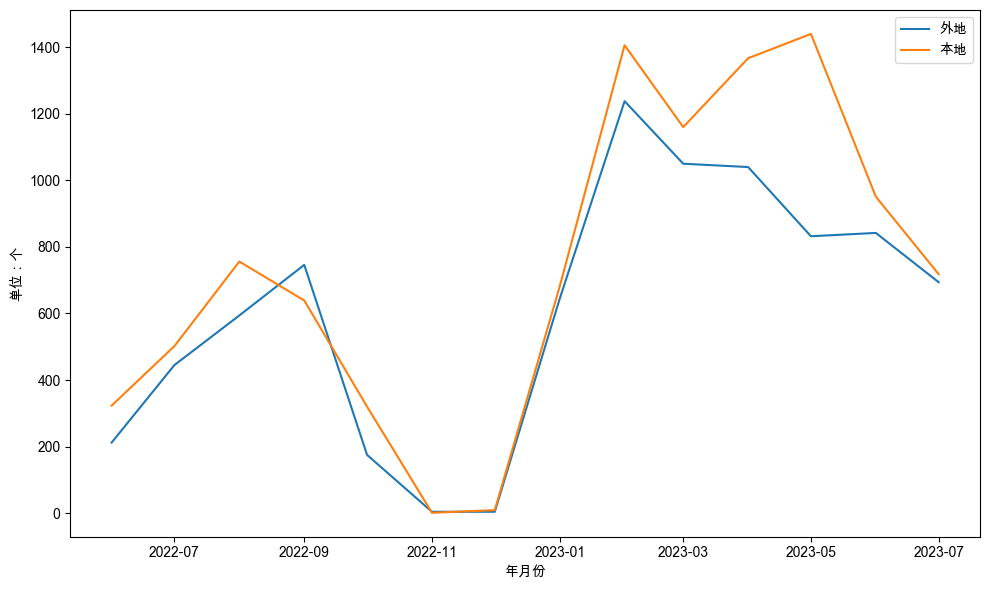

/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['统计值'] = selected_data['统计值'].astype(int)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['集团系名称'] = selected_data['集团系名称'].map(matched_names)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/815410254.py:10: SettingWithCopyWarning: 
A value is trying to be 

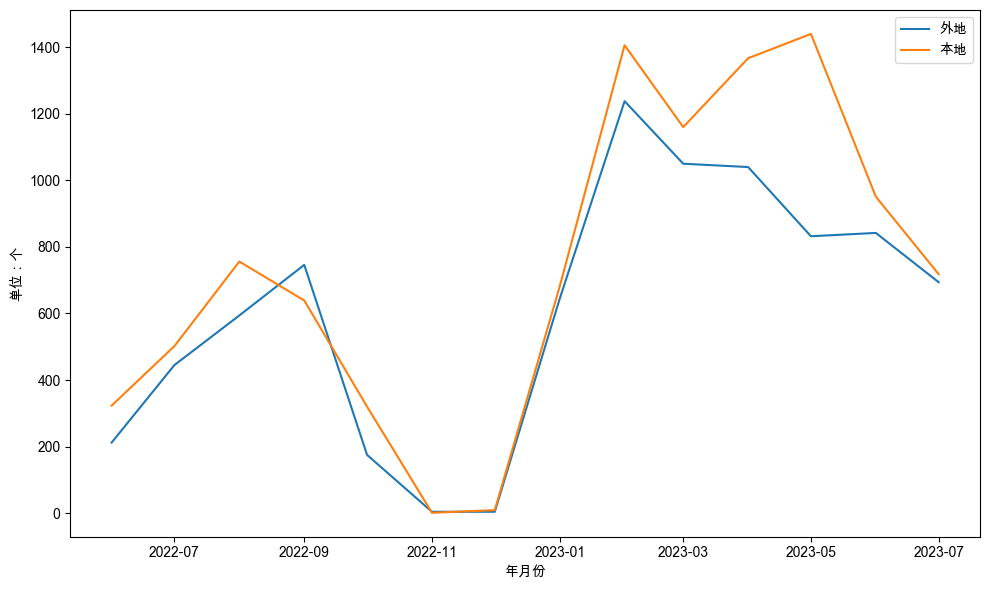

/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['统计值'] = selected_data['统计值'].astype(int)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['集团系名称'] = selected_data['集团系名称'].map(matched_names)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/815410254.py:10: SettingWithCopyWarning: 
A value is trying to be 

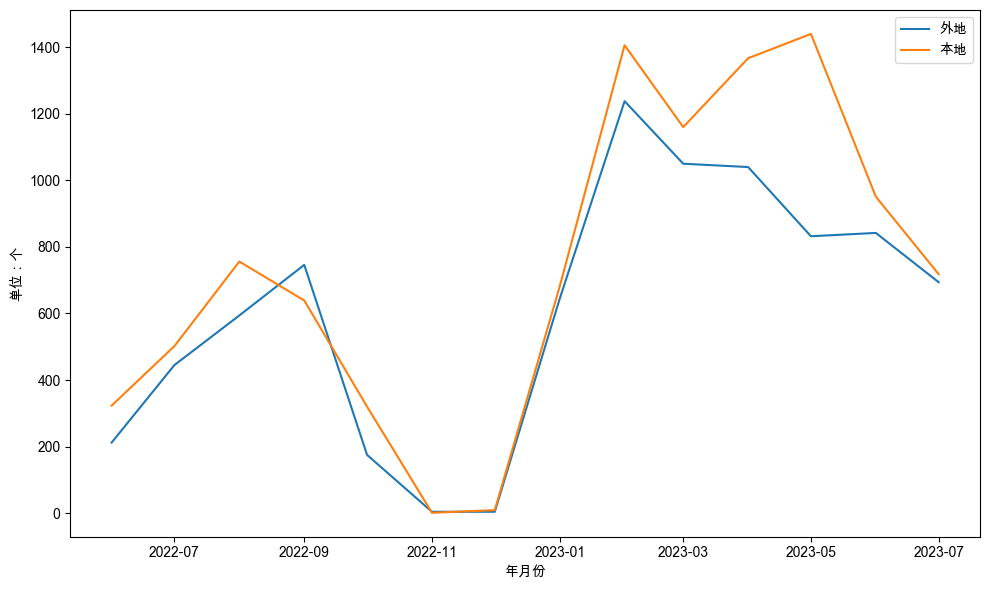

/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['统计值'] = selected_data['统计值'].astype(int)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['集团系名称'] = selected_data['集团系名称'].map(matched_names)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/815410254.py:10: SettingWithCopyWarning: 
A value is trying to be 

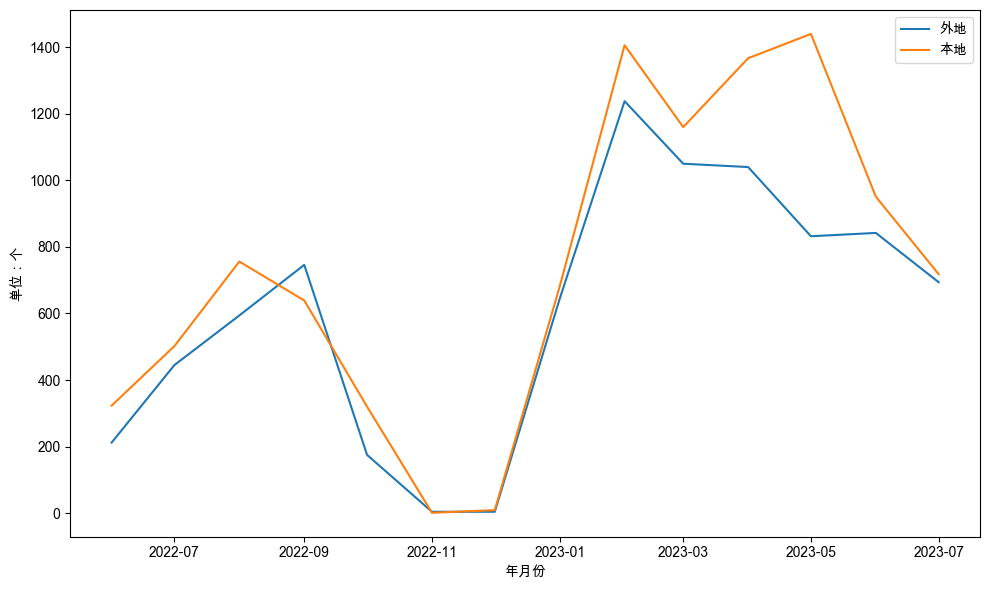

/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['统计值'] = selected_data['统计值'].astype(int)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['集团系名称'] = selected_data['集团系名称'].map(matched_names)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/815410254.py:10: SettingWithCopyWarning: 
A value is trying to be 

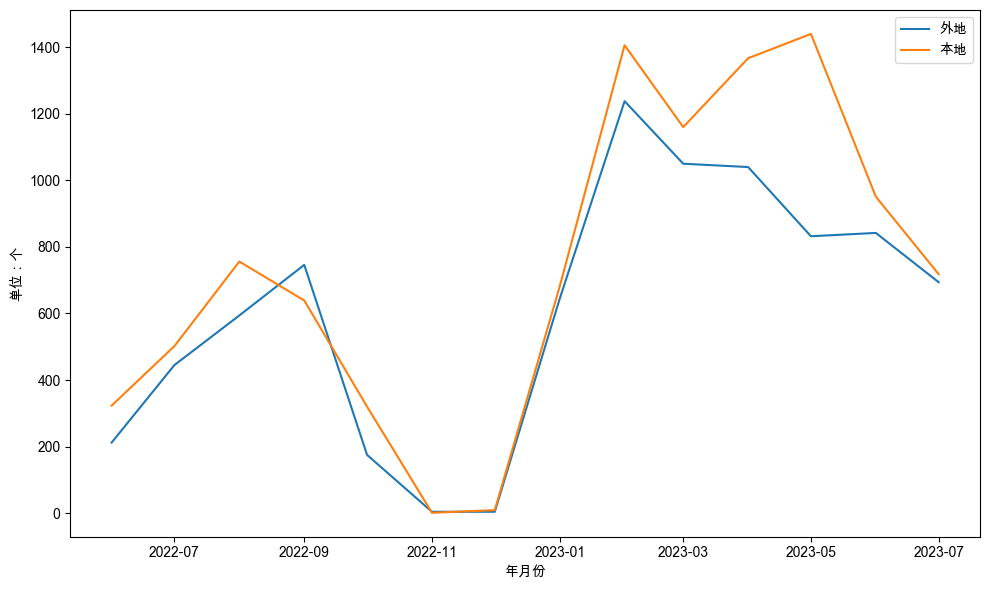

/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['统计值'] = selected_data['统计值'].astype(int)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['集团系名称'] = selected_data['集团系名称'].map(matched_names)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/815410254.py:10: SettingWithCopyWarning: 
A value is trying to be 

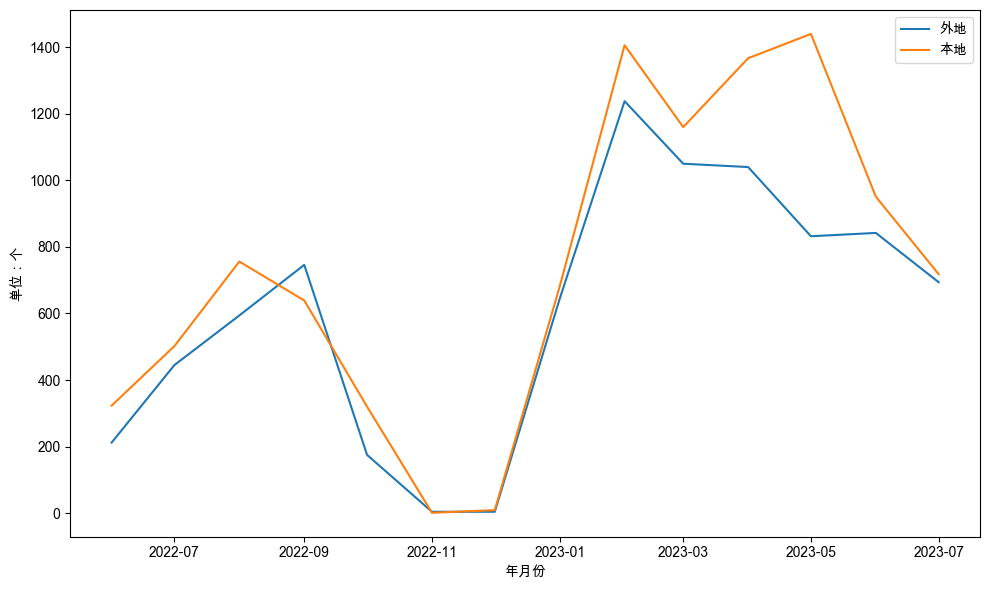

/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['统计值'] = selected_data['统计值'].astype(int)
/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_64954/2089829452.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['集团系名称'] = selected_data['集团系名称'].map(matched_names)


In [290]:
# 调用函数并传入数据和输出路径
data_path = '/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx'
output_image_path = '/Users/harvin/code/自动报告产品开发-产业链@20220830/data/chart_2022_nov.png'

for i in range(7,13):
    generate_monthly_chart(data_path, output_image_path, start_year=2022, start_month=6)
    if i <10:
        i='0'+str(i)
    t='2022'+str(i)
    generate_report(t,output_image_path)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设您的数据已经加载并准备好了
job_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='招聘')

# 选择报告期编码为 '202307' 的数据
selected_data = job_df[(job_df['指标名称'] == '地区分布岗位数量')]
selected_data['统计值'] = selected_data['统计值'].astype(int)

# 按照集团系名称、报告期编码和招聘地区进行分组聚合
aggregated_df = selected_data.groupby(['集团系名称', '报告期编码', '招聘地区']).agg({'统计值': 'sum'}).reset_index()

# 将报告期编码转换为字符串格式
aggregated_df['报告期编码'] = aggregated_df['报告期编码'].astype(str)

# 添加年月份列，提取年份和月份前六个字符作为年月份
aggregated_df['年月份'] = pd.to_datetime(aggregated_df['报告期编码'].str[:6], format='%Y%m')

# 仅选择 2022 年 11 月之后的数据
filtered_data = aggregated_df[(aggregated_df['年月份'].dt.year > 2022) | ((aggregated_df['年月份'].dt.year == 2022) & (aggregated_df['年月份'].dt.month >= 6))]

# 按照年月份进行分组并对统计值进行求和
grouped_data = filtered_data.groupby(['年月份', '招聘地区'])['统计值'].sum().reset_index()

# 按年月份进行排序
grouped_data = grouped_data.sort_values(by='年月份')

# 创建一个新的 Figure 对象
plt.figure(figsize=(10, 6))

# 循环遍历不同的招聘地区
for area in grouped_data['招聘地区'].unique():
    # 按照招聘地区筛选数据
    area_data = grouped_data[grouped_data['招聘地区'] == area]
    
    # 绘制折线图，x轴为年月份，y轴为统计值
    plt.plot(area_data['年月份'], area_data['统计值'], label=area)

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('年月份')
plt.ylabel('统计值')
plt.title('信息软件业招聘岗位2022年6月及之后不同招聘地区的月度统计值')

# 显示图形
plt.xticks(rotation=45)  # 旋转x轴标签，使其更易读
plt.tight_layout()  # 自动调整布局，避免标签重叠
plt.savefig('/Users/harvin/code/自动报告产品开发-产业链@20220830/data/chart_2022_nov.png')
plt.show()
